# 앙살블 기법

- 앙상블 기법
    - 앙상블은 전통적으로 Voting, Bagging, Boosting, 스태깅 등으로 나눔
    - 보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
    - 보팅과 배깅의 차이점은 보팅은 각각 다른 분류기, 배깅은 같은 분류기를 사용
    - 대표적인 배깅 방식이 포레스트

- Boosting의 개요
    - 여러개의 (약한)분류기가 순차적으로 학습하면서, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 다음 분류기가 가중치를 인가해서 학습을 이어 진행하는 방식
    - 예측 성능이 뛰어나서 앙상블 학습을 주도하고 있음
        - 그래디언트부스트, XGBoost, LightGBM 등이 있음

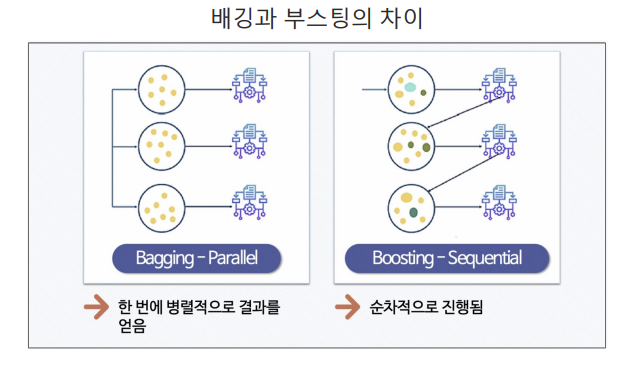

- Adaboost
    - step1)
        - 순차적으로 가중치를 부여해서 최종 결과를 얻음
        - Decision Tree 기반의 알고리즘
    - step2)
        - step1에서 틀린 +에 가중치를 인가하고 다시 경계를 결정
    - step3)
        - 다시 놓친 -에 가중치를 인가하고 다시 경계를 결정
    - step4)
        - 앞서 결정한 경계들을 합침

- 부스팅 기법
    - GBM(GradientBoosting Machine): Adaboost 기법과 비슷하지만, 가중치를 업데이트할 때, 경사하강법을 사용
    - XGBoost(eXtra Gradient Boost): GBM에서 PC의 파워를 효율적으로 사용하기 위한 다양한 기법에 채택되어 빠른 속도와 효율을 가짐
    - LightGBM : XGBoost보다 빠른 속도를 가짐


In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)

wine['taste'] = [1. if grade>5 else 0. for grade in wine["quality"]]

X = wine.drop(['taste','quality'], axis=1)
y = wine["taste"]

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0


In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 13)

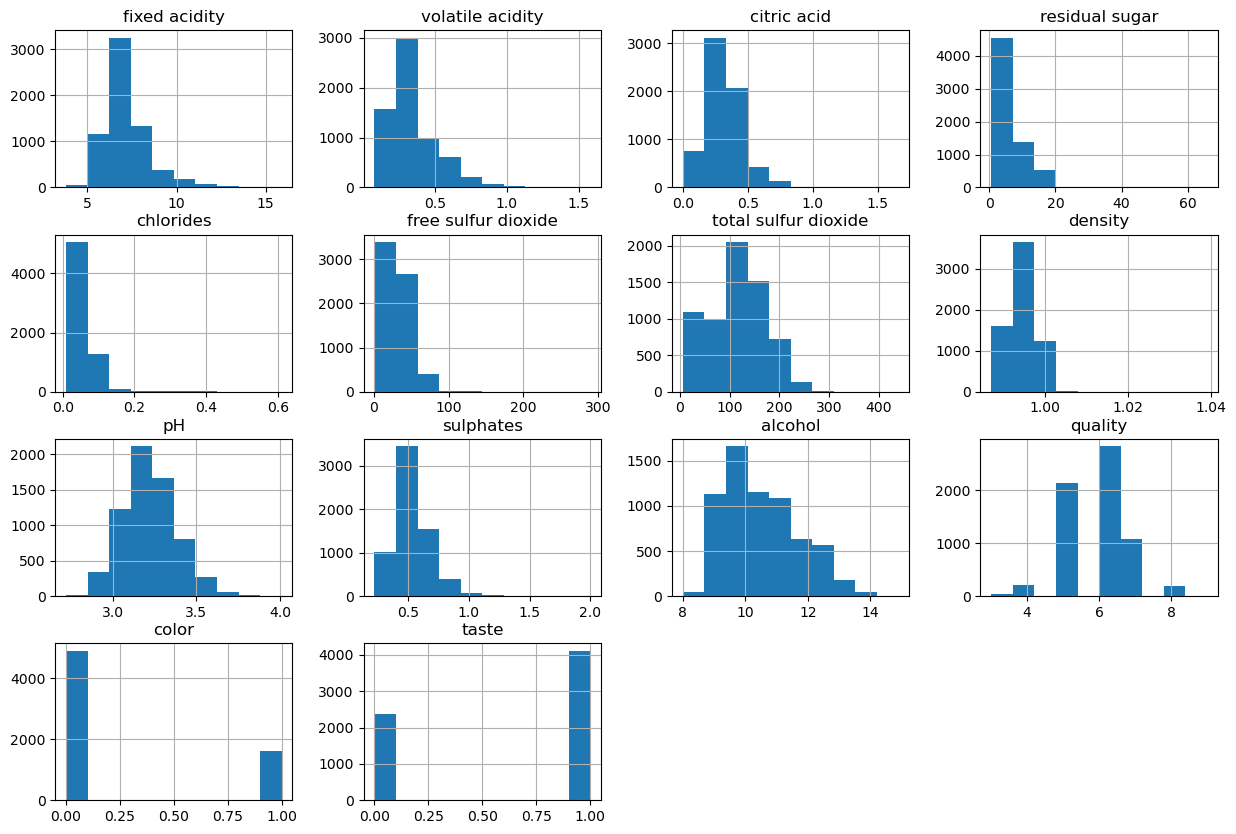

In [3]:
# 모든 컬럼의 히스트그램 조사
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(bins=10, figsize=(15,10))
plt.show()

In [4]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [5]:
# quality별 특성이 다른지?
column_names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

df_pivot_table = wine.pivot_table(column_names, ['quality'], aggfunc='median')
print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          10.15     0.0550         0.33  0.995900           7.45   
4          10.00     0.0505         0.26  0.994995           7.00   
5           9.60     0.0530         0.30  0.996100           7.10   
6          10.50     0.0460         0.31  0.994700           6.90   
7          11.40     0.0390         0.32  0.992400           6.90   
8          12.00     0.0370         0.32  0.991890           6.80   
9          12.50     0.0310         0.36  0.990300           7.10   

         free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                          
3                       17.0  3.245            3.15      0.505   
4                       15.0  3.220            2.20      0.485   
5                       27.0  3.190            3.00      0.500   
6                       29.0  3.210            3

In [6]:
corr_matrix = wine.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


c:\Users\qnwje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


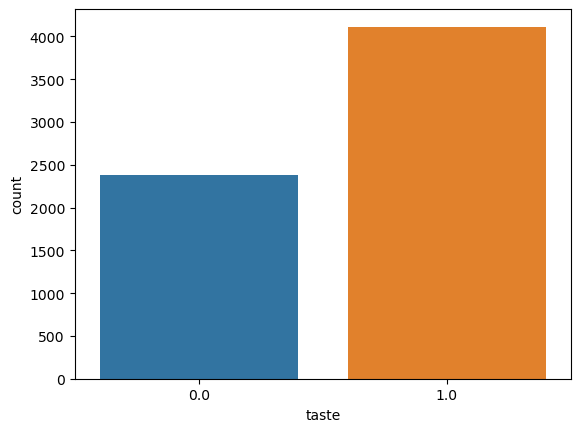

In [7]:
import seaborn as sns

sns.countplot(wine["taste"])
plt.show()

In [8]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [11]:
# 결과를 저장하기 위한 작업
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv =kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8195048863552232 0.017217610204609483
DecisionTreeClassifier 0.7535092914784925 0.00978350606925897
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7665884356259718 0.021614689094861146
LogisticRegression 0.7354207077811504 0.01375327518927125


c:\Users\qnwje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\qnwje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

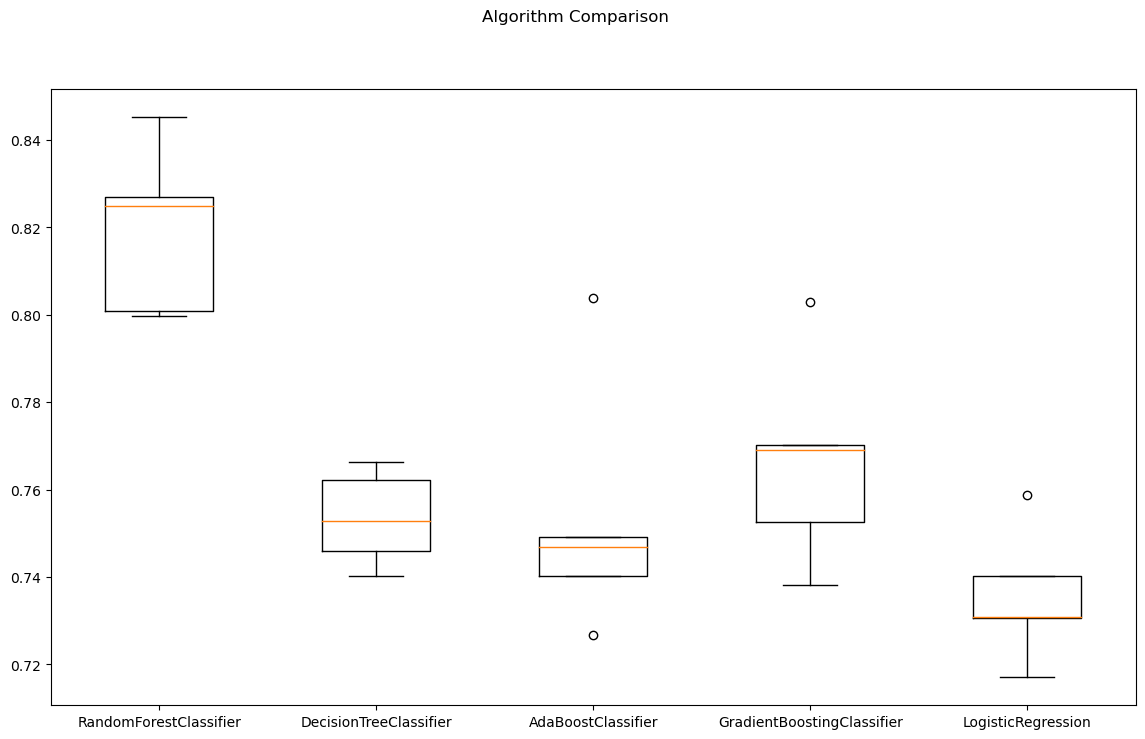

In [12]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

RandomForestClassifier 0.8353846153846154
DecisionTreeClassifier 0.7746153846153846
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
LogisticRegression 0.7346153846153847


c:\Users\qnwje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## k Nearest Neighbor

- kNN
    - 새로운 데이터가 있을 때, 기존 데이터의 그룹 중 어떤 그룹에 속하는지를 분류하는 문제
    - k는 몇 번째 가까운 데이터까지 볼 것인가를 정하는 수치
    - 유클리드 기하로 거리 계산
    - 단위에 따라 바뀔수도 있다. -표준화 필요

- 장단점
    - 실시간 예측을 위한 학습이 필요치 않다.
    - 속도가 빨라진다.
    - 고차원 데이터에는 적합하지 않다.


In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state= 13, stratify= iris.target)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


c:\Users\qnwje\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### GBM

- 부스팅 알고리즘은 여러 개의 약한 학습지를 순차적으로 학습-예측 하면서 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선해가는 방식
- GBM은 가중치를 업데이트할 때 경사 하강법(Gradient Desent)을 이용하는 것이 큰 차이

In [19]:
import pandas as pd

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'


feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=["column_index",'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()
X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

X_train.columns = feature_name
X_test.columns = feature_name

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')

In [21]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('ACC: ', accuracy_score(y_test, gb_pred))
print('Fit time : ', time.time() - start_time)

ACC:  0.9385816084153377
Fit time :  514.9619336128235


- ACC가 93.9%, 계산시간 515초
- 일반적으로 GBM이 성능자체는 랜덤포레스트 보다는 좋다고 알려져 있음
- sckit-learn의 GBM은 속도가 아주 느림

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fit time :  3727.3968164920807


In [23]:
grid.best_score_

0.9007072905331882

In [24]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 500}

In [25]:
accuracy_score(y_test, grid.best_estimator_.predict(X_test))

0.9392602646759416

#### XGBoost

- XGBoost
    - XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받는 알고리즘 중 하나
    - GBM기반의 알고리즘 인데, GBM의 느린 속도를 다양한 규제를 통해 해결
    - 특히 병렬 학습이 가능하도록 설계됨
    - XGBoost는 반복 수행 시마다 내부적으로 학습데이터와 검증데이터를 교차검증을 수행
    - 교차검증을 통해 최적화되면 반복을 중단하는 조기 중단 기능을 가지고 있음

- 주요 파라미터
    - nthread : CPU의 실행 스레드 개수를 조정. 디폴트는 CPU의 전체 스레드를 사용하는 것
    - eta : GBM 학습률
    - num_boost_rounds : n_estimators와 같은 파라미터
    - max_depth

In [ ]:
!pip install xgboost

In [28]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

start_time = time.time()

le = LabelEncoder()
y_train = le.fit_transform(y_train)

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth = 3)
xgb.fit(X_train.values, y_train)

print('Fit time : ', time.time() - start_time)

Fit time :  39.06057071685791


In [29]:
y_pred = xgb.predict(X_test.values)
y_pred = le.inverse_transform(y_pred)

accuracy_score(y_test, y_pred)

0.9497794367153037

In [32]:
# 조기 종료 조건과 검증데이터를 지정할 수 있다.
from xgboost import XGBClassifier

y_test = le.fit_transform(y_test)
evals = [(X_test.values, y_test)]

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth = 3)
xgb.fit(X_train.values, y_train,  eval_set = evals)

print('Fit time : ', time.time() - start_time)

[0]	validation_0-mlogloss:1.58912
[1]	validation_0-mlogloss:1.43298
[2]	validation_0-mlogloss:1.30579
[3]	validation_0-mlogloss:1.19398
[4]	validation_0-mlogloss:1.10151
[5]	validation_0-mlogloss:1.01952
[6]	validation_0-mlogloss:0.94821
[7]	validation_0-mlogloss:0.88468
[8]	validation_0-mlogloss:0.82846
[9]	validation_0-mlogloss:0.77660
[10]	validation_0-mlogloss:0.73051
[11]	validation_0-mlogloss:0.68873
[12]	validation_0-mlogloss:0.65163
[13]	validation_0-mlogloss:0.61809
[14]	validation_0-mlogloss:0.58776
[15]	validation_0-mlogloss:0.55936
[16]	validation_0-mlogloss:0.53447
[17]	validation_0-mlogloss:0.51131
[18]	validation_0-mlogloss:0.49076
[19]	validation_0-mlogloss:0.47043
[20]	validation_0-mlogloss:0.45119
[21]	validation_0-mlogloss:0.43441
[22]	validation_0-mlogloss:0.41777
[23]	validation_0-mlogloss:0.40352
[24]	validation_0-mlogloss:0.38949
[25]	validation_0-mlogloss:0.37684
[26]	validation_0-mlogloss:0.36371
[27]	validation_0-mlogloss:0.35286
[28]	validation_0-mlogloss:0.3

In [34]:
accuracy_score(y_test, xgb.predict(X_test.values))

0.9497794367153037

#### LightGBM

- LightGBM
    - LightGBM은 XGBoost와 함께 부스팅 계열에서 가장 각광받는 알고리즘
    - LGBM의 큰 장점은 속도
    - 단, 적은 수의 데이터에는 어울리지 않음 (일반적으로 10000건 이상의 데이터가 필요하다고 함)
    - GPU 버전도 존재함


In [ ]:
!pip install lightgbm

In [36]:
from lightgbm import LGBMClassifier

start_time = time.time()
lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train.values, y_train,  eval_set = evals)

print('Fit time : ', time.time() - start_time)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140170
[LightGBM] [Info] Number of data points in the train set: 7352, number of used features: 561
[LightGBM] [Info] Start training from score -1.791216
[LightGBM] [Info] Start training from score -1.924514
[LightGBM] [Info] Start training from score -2.009071
[LightGBM] [Info] Start training from score -1.743436
[LightGBM] [Info] Start training from score -1.677246
[LightGBM] [Info] Start training from score -1.653513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [37]:
accuracy_score(y_test, lgbm.predict(X_test))

0.9375636240244316

# Credit Card Fraud Detection

- 신용카드 부정 사용자 검출
    - 신용카드 사기 검출 분류 실습용 데이터
    - 데이터에 class라는 이름의 칼럼이 사기 유무를 의미
    - class 칼럼의 불균형이 극심해서 전체 데이터의 약 0.172%가 1(사기 Fraud)을 가짐

- 데이터 특성
    - 금융 데이터이고 기업의 기밀보호를 위해 대다수 특성의 이름은 삭제되어 있음
    - Amount: 거래금액
    - Class: Fraud여유(1이면 Fraud)

- 데이터의 불균형이 극심함

In [54]:
import pandas as pd

data_path = 'data/creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
raw_data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100, 2)
print('Frauds ', frauds_rate, '% of the dataset')

Frauds  0.17 % of the dataset


<AxesSubplot:xlabel='Class', ylabel='count'>

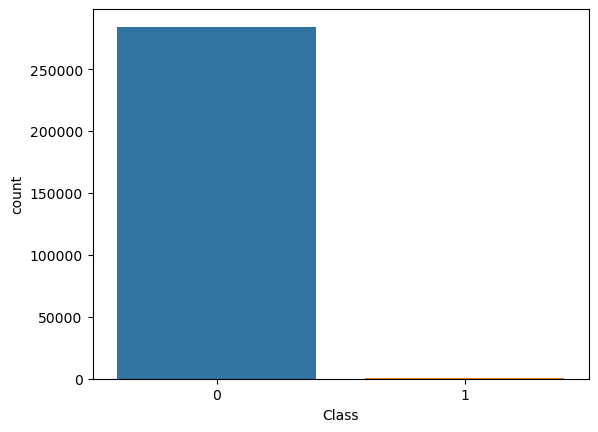

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('Class', data = raw_data)


In [58]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [63]:
y_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
53708,-2.034220,1.670359,1.377750,0.674548,-0.648146,-0.520401,0.398133,0.252472,0.349831,1.025444,...,0.586229,0.005362,0.548214,-0.365167,0.401010,0.710472,-0.100256,0.466929,0.194816,46.78
249988,1.974120,-0.809883,-0.676559,-1.369053,-1.026026,-1.281213,-0.412713,-0.190390,2.183410,-0.958966,...,-0.138161,-0.205360,-0.500707,0.340161,0.019445,-0.450619,-0.565748,0.014810,-0.031586,50.34
176536,-1.487805,1.153361,1.766754,-1.842626,1.251140,1.072848,2.883501,-2.446128,3.845544,5.009713,...,1.702473,-0.596972,1.106413,-0.603324,0.230287,-0.419304,0.181660,-1.195708,-1.951939,95.80
279223,-0.864220,0.800168,1.743000,3.118002,-0.184199,0.867168,-0.219067,0.923531,-0.712231,0.192327,...,-0.248935,-0.118959,-0.649247,0.264355,0.918176,-0.261086,-0.343869,-0.121687,-0.089326,56.95
239820,2.053311,0.089735,-1.681836,0.454212,0.298310,-0.953526,0.152003,-0.207071,0.587335,-0.362047,...,-0.187421,-0.361158,-0.984262,0.354198,0.620709,-0.297138,0.166736,-0.068299,-0.029585,8.99


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)


In [65]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [66]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train) * 100

0.17254870488152324

#### 단순한 시도

In [67]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

In [68]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('==========')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

In [69]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889
Recall: 0.5946, F1: 0.7126, AUC: 0.7972


In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833
Recall: 0.7162, F1: 0.7910, AUC: 0.8580


In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565
Recall: 0.7432, F1: 0.8365, AUC: 0.8716


In [72]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=64,n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
=> confusion matrix
[[85286     9]
 [   36   112]]
Accuracy: 0.9995, Precision: 0.9256
Recall: 0.7568, F1: 0.8327, AUC: 0.8783


- 은행 입장에서는 Recall이 좋을 것
- 사용자 입장에서는 Precision이 좋을 것

In [73]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [76]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ["accuracy", "precision","recall","f1","roc_auc"]
    tmp = []
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index= model_names)

In [77]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ["LinearReg","DecisionTree","RandomForest","LightGBM"]

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
Fit time :  33.64373159408569


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999473,0.925620,0.756757,0.832714,0.878326


#### 데이터 정리 후 다시 시도

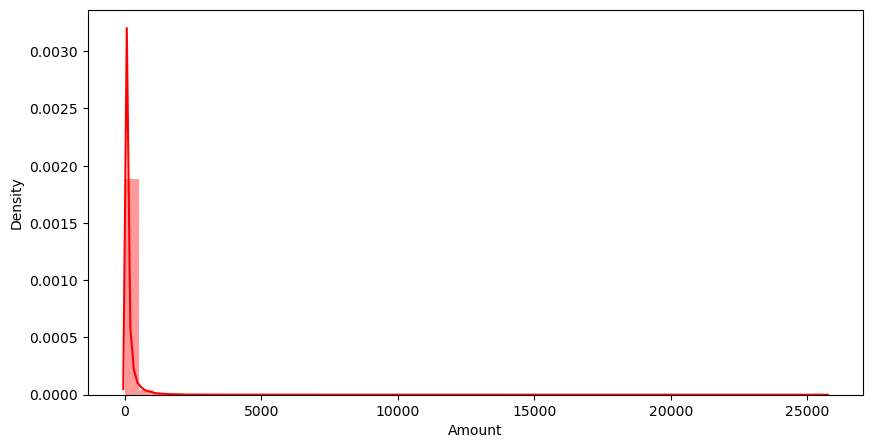

In [78]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data["Amount"], color='r')

plt.show()
# 칼럼의 분포가 특정 대역이 아주 많다.

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data["Amount"].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy["Amount_Scaled"] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [90]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

In [91]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ["LinearReg","DecisionTree","RandomForest","LightGBM"]

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
Fit time :  33.080615758895874


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999497,0.941176,0.756757,0.838951,0.878337


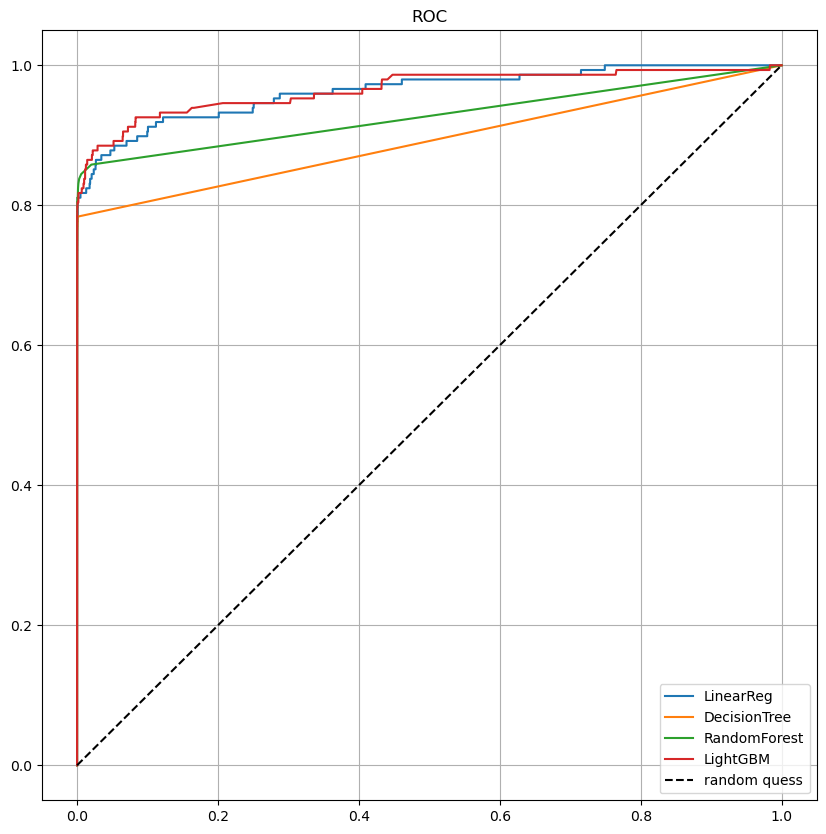

In [92]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1],[0,1], 'k--', label="random quess")
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)

In [93]:
# log scale

amount_log = np.log1p(raw_data["Amount"])

raw_data_copy["Amount_Scaled"] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


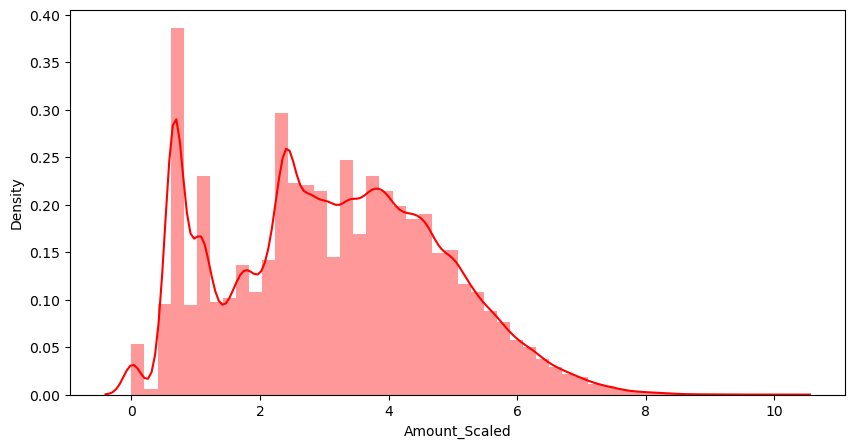

In [94]:
plt.figure(figsize=(10, 5))
sns.distplot(raw_data_copy["Amount_Scaled"], color='r')

plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
Fit time :  30.746860027313232


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999473,0.925620,0.756757,0.832714,0.878326


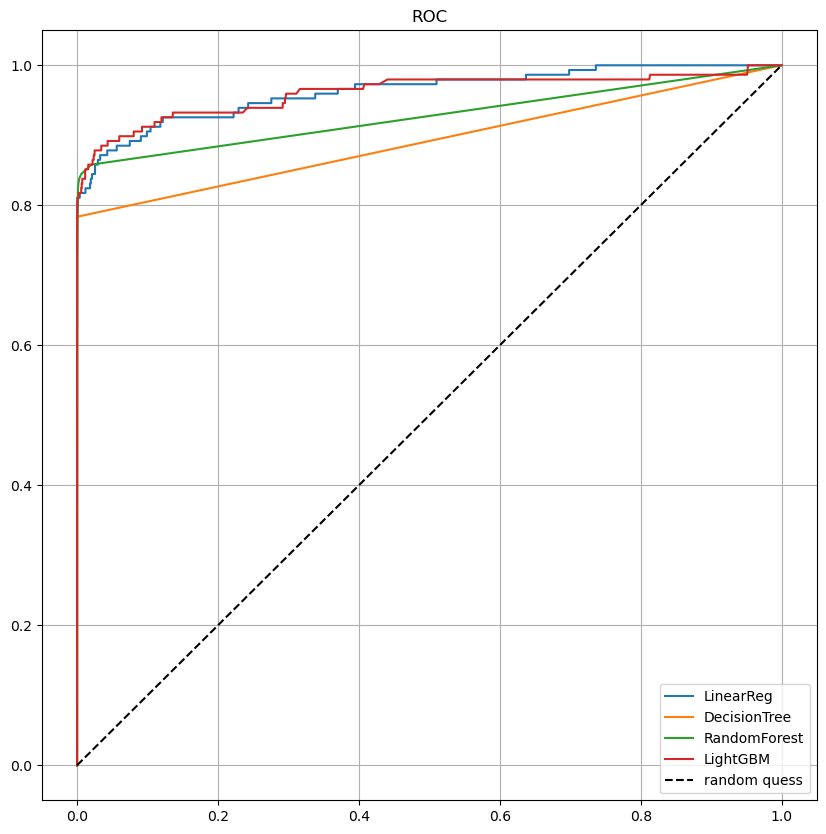

In [96]:
draw_roc_curve(models, model_names, X_test, y_test)

#### Outlier 정리

<AxesSubplot:>

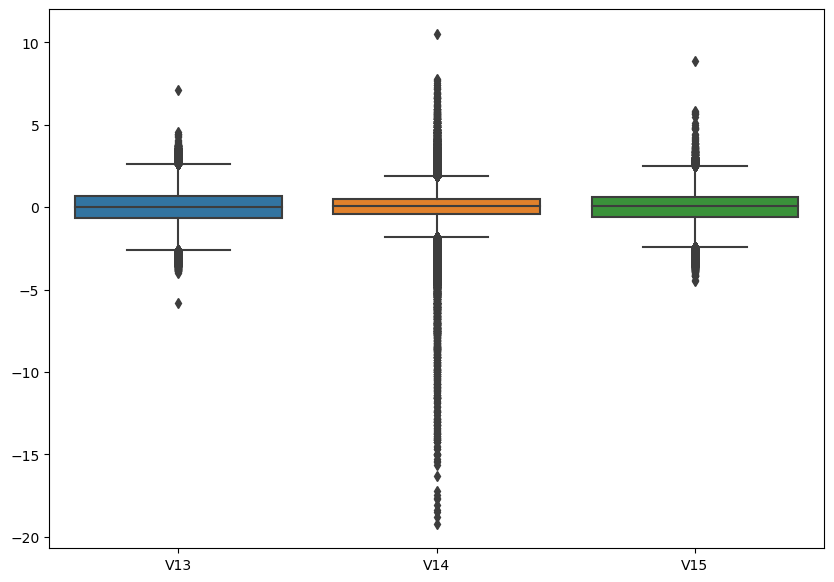

In [97]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.boxplot(data=raw_data[['V13','V14','V15']])

In [98]:
# outlier의 인덱스를 파악하는 코드

def get_outlier(df=None, column = None, weight = 1.5):
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [99]:
get_outlier(df= raw_data, column='V14', weight=1.5)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [100]:
raw_data_copy.shape

(284807, 29)

In [101]:
outlier_index = get_outlier(df= raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0, inplace= True)
raw_data_copy.shape

(284803, 29)

In [103]:
X = raw_data_copy
raw_data.drop(outlier_index, axis=0, inplace= True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [104]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ["LinearReg","DecisionTree","RandomForest","LightGBM"]

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
Fit time :  31.8850576877594


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999544,0.928000,0.794521,0.856089,0.897208


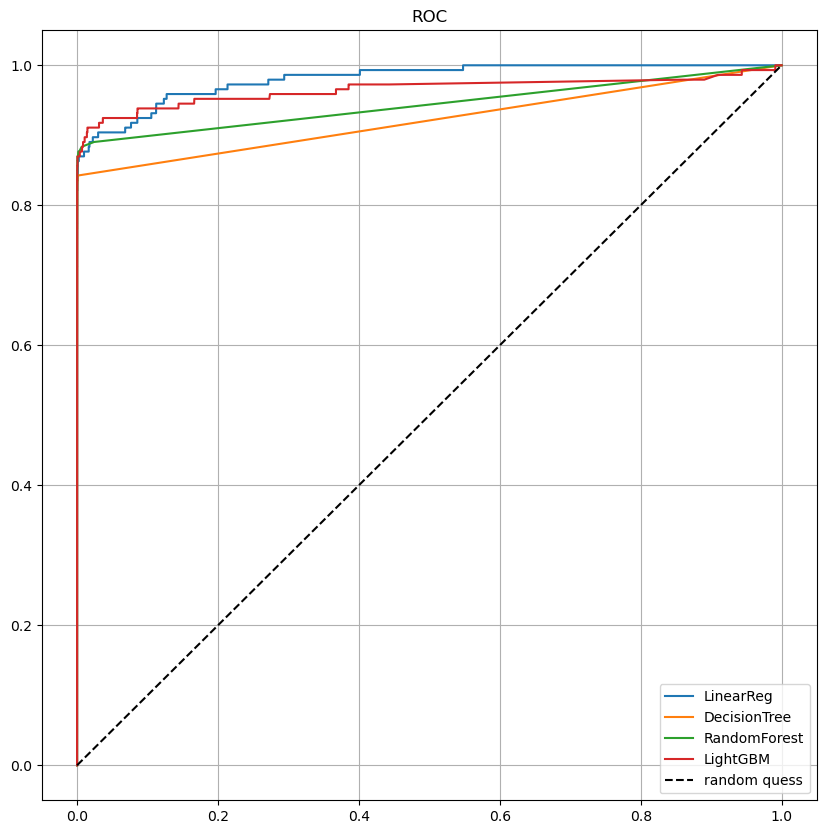

In [105]:
draw_roc_curve(models, model_names, X_test, y_test)

#### SMOTE Oversampling

- 데이터의 불균형이 극심할 때 불균형한 두 클래스의 분포를 강제로 맞춰보는 작업
- 언더샘플링 : 많은 수의 데이터를 적은 수의 데이터로 강제로 조정
- 오버샘플링:
    - 원본데이터의 피처 값들을 아주 약간 변경하여 증식
    - 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있음
    - 적은 데이터 세트에 있는 개별 데이터를 k-최근접이웃 방법으로 찾아서 데이터의 분포 사이에 새로운 데이터를 만드는 방식
    - imbalanced-learn 이라는 Python pkg가 있음

In [106]:
!pip install imbalanced-learn

In [109]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [110]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [111]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [112]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [113]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ["LinearReg","DecisionTree","RandomForest","LightGBM"]

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results
# recall은 확실히 좋아짐

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
Fit time :  58.46600866317749


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.046048,0.869863,0.087466,0.919509
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999286,0.757576,0.856164,0.803859,0.927848


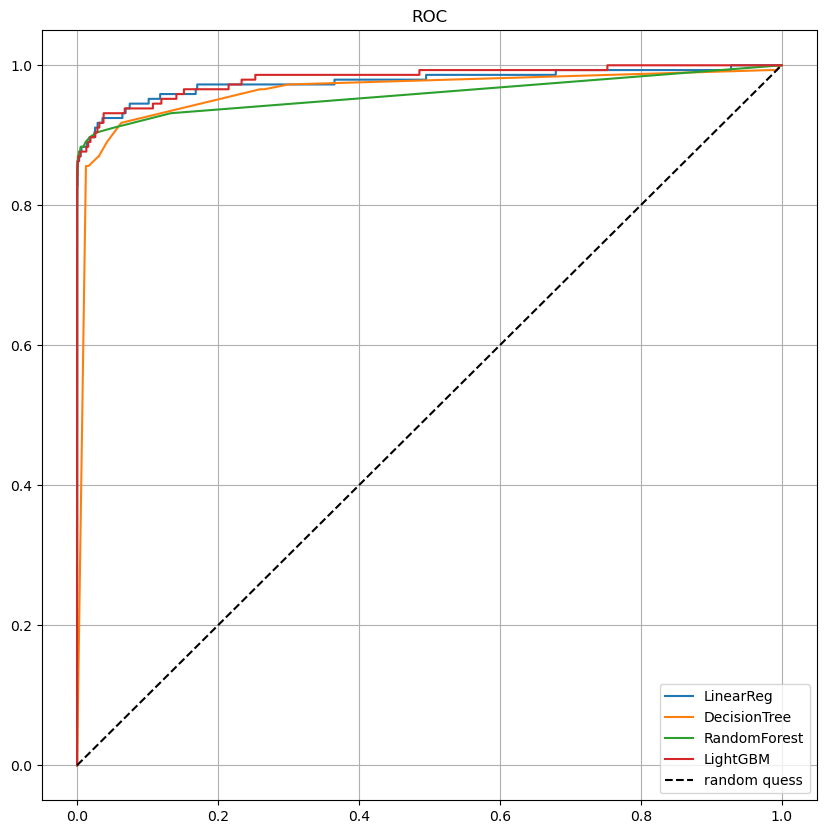

In [114]:
draw_roc_curve(models, model_names, X_test, y_test)